### Image classification using Lego brick images

https://www.kaggle.com/joosthazelzet/lego-brick-images

In [9]:
#%conda install -c conda-forge opencv

In [10]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2

import os
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [11]:
DATASET_PATH = '../datasets/Lego/train/'

In [12]:
!ls -l '../datasets/Lego/train/'

total 276
drwxr-xr-x 2 user user 20480 Aug 19 20:49 11214 Bush 3M friction with Cross axle
drwxrwxr-x 2 user user 20480 Feb  4 08:29 18651 Cross Axle 2M with Snap friction
drwxr-xr-x 2 user user 20480 Aug 19 20:49 2357 Brick corner 1x2x2
drwxr-xr-x 2 user user 12288 Aug 19 20:49 3003 Brick 2x2
drwxrwxr-x 2 user user 12288 Feb  4 08:29 3004 Brick 1x2
drwxr-xr-x 2 user user 12288 Aug 19 20:49 3005 Brick 1x1
drwxr-xr-x 2 user user 20480 Aug 19 20:49 3022 Plate 2x2
drwxr-xr-x 2 user user 12288 Aug 19 20:49 3023 Plate 1x2
drwxr-xr-x 2 user user 12288 Aug 19 20:49 3024 Plate 1x1
drwxrwxr-x 2 user user 20480 Feb  4 08:29 3040 Roof Tile 1x2x45deg
drwxr-xr-x 2 user user 12288 Aug 19 20:49 3069 Flat Tile 1x2
drwxr-xr-x 2 user user 20480 Aug 19 20:49 32123 half Bush
drwxrwxr-x 2 user user 12288 Feb  4 08:29 3673 Peg 2M
drwxr-xr-x 2 user user 20480 Aug 19 20:49 3713 Bush for Cross Axle
drwxr-xr-x 2 user user 20480 Aug 19 20:49 3794 Plate 1X2 with 1 Knob
drwxr-xr-x 2 user user 20480 Aug 19 20:49 66

In [13]:
def load_images(path):
    
    images_train = []
    labels_train = []
    
    for sub_folder in os.listdir(path):
        fullpath = os.path.join(path, sub_folder)
        print(fullpath)

        if not os.path.isdir(fullpath):
            continue

        images = os.listdir(fullpath)
        
        for image_filename in images:
            
            image_fullpath = os.path.join(fullpath, image_filename)

            if os.path.isdir(image_fullpath):
                continue
            
            img = cv2.imread(image_fullpath)

            images_train.append(img)
            labels_train.append(sub_folder)
            
    return np.array(images_train), np.array(labels_train)

In [14]:
images_train, labels_train = load_images(DATASET_PATH)

../datasets/Lego/train/6632 Technic Lever 3M
../datasets/Lego/train/_DS_Store
../datasets/Lego/train/3004 Brick 1x2
../datasets/Lego/train/3713 Bush for Cross Axle
../datasets/Lego/train/3040 Roof Tile 1x2x45deg
../datasets/Lego/train/3022 Plate 2x2
../datasets/Lego/train/18651 Cross Axle 2M with Snap friction
../datasets/Lego/train/3005 Brick 1x1
../datasets/Lego/train/3003 Brick 2x2
../datasets/Lego/train/11214 Bush 3M friction with Cross axle
../datasets/Lego/train/3023 Plate 1x2
../datasets/Lego/train/3673 Peg 2M
../datasets/Lego/train/3794 Plate 1X2 with 1 Knob
../datasets/Lego/train/3069 Flat Tile 1x2
../datasets/Lego/train/2357 Brick corner 1x2x2
../datasets/Lego/train/3024 Plate 1x1
../datasets/Lego/train/32123 half Bush


In [15]:
images_train.shape

(6379, 200, 200, 3)

In [16]:
images_train[0].shape

(200, 200, 3)

In [17]:
labels_train.shape

(6379,)

Label:  6632 Technic Lever 3M


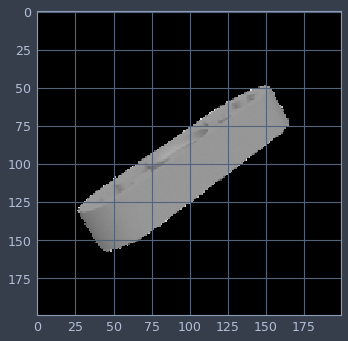

In [18]:
plt.imshow(images_train[10])

print('Label: ', labels_train[10])

Label:  6632 Technic Lever 3M


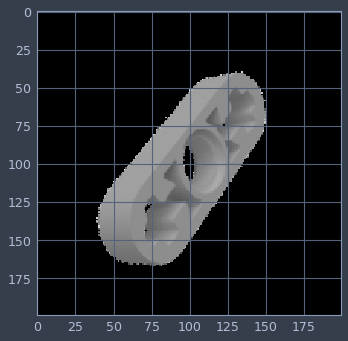

In [19]:
plt.imshow(images_train[11])

print('Label: ', labels_train[11])

Label:  3713 Bush for Cross Axle


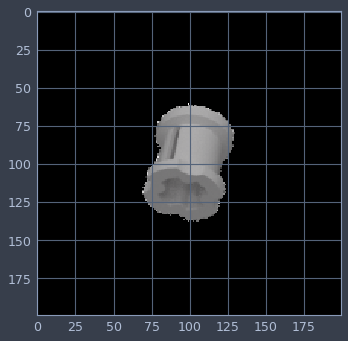

In [20]:
plt.imshow(images_train[1000])

print('Label: ', labels_train[1000])

Label:  3713 Bush for Cross Axle


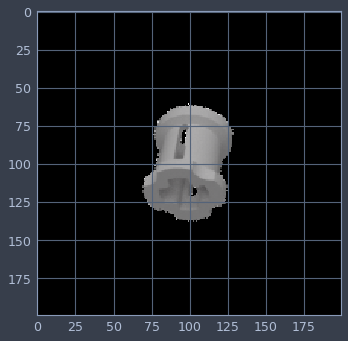

In [21]:
plt.imshow(images_train[1001])

print('Label: ', labels_train[1001])

In [22]:
X = images_train.reshape(images_train.shape[0], 
                         images_train.shape[1] * images_train.shape[2] * images_train.shape[3])

In [23]:
X.shape

(6379, 120000)

In [24]:
X[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

Y = encoder.fit_transform(labels_train)

In [26]:
np.unique(Y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size = 0.2)

x_train.shape, y_train.shape

((5103, 120000), (5103,))

In [28]:
x_test.shape, y_test.shape

((1276, 120000), (1276,))

In [29]:
from sklearn.neural_network import MLPClassifier

In [30]:
clf_image = MLPClassifier(activation = 'relu',
                          hidden_layer_sizes = (100, 100, 100), 
                          solver='adam', 
                          verbose=True,
                          max_iter=100)

In [31]:
clf_image.fit(x_train, y_train)

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = 11.85667631
Iteration 4, loss = 9.78731455
Iteration 5, loss = 6.59633671
Iteration 6, loss = 5.44340219
Iteration 7, loss = 3.14660514
Iteration 8, loss = 3.28563095
Iteration 9, loss = 3.32240504
Iteration 10, loss = 2.48200317
Iteration 11, loss = 2.48539097
Iteration 12, loss = 2.03859273
Iteration 13, loss = 1.80607546
Iteration 14, loss = 1.37792346
Iteration 15, loss = 1.58121152
Iteration 16, loss = 1.77343029
Iteration 17, loss = 1.69202164
Iteration 18, loss = 2.16158723
Iteration 19, loss = 1.67298178
Iteration 20, loss = 2.06964748
Iteration 21, loss = 4.91713849
Iteration 22, loss = 3.38801994
Iteration 23, loss = 2.71732306
Iteration 24, loss = 2.56137875
Iteration 25, loss = 1.96366747
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [32]:
y_pred = clf_image.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8401253918495298